/home/jells123/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


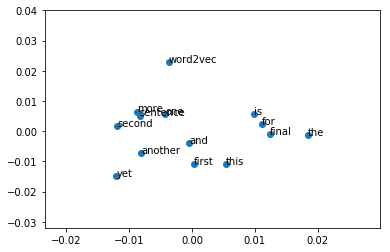

In [11]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [
    ['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
    ['this', 'is', 'the', 'second', 'sentence'],
    ['yet', 'another', 'sentence'],
    ['one', 'more', 'sentence'],
    ['and', 'the', 'final', 'sentence']
]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [85]:
import os
from nltk.tokenize import sent_tokenize, word_tokenize
from data_helpers import clean_sentence

import re
pattern = re.compile(r'<\/*[a-zA-Z]+>')

root = '/home/jells123/Documents/ENGINEER/DATA/1-Raw data/data/'
ann = '/annotations'
pt = '/additional_plaintext'

sets = {
    'Train' : 'train',
    'Dev' : 'dev',
    'Test' : 'test_3'
}
s_type = sets['Train']

sentences = []

# for k in sets.keys():
#     s_type = sets[k]
path = root + s_type + ann
for filename in os.listdir(path):
    if filename.endswith('.txt'):
        with open(path + "/" + filename, 'r') as file:
            content = file.read()
            content = re.sub(r'[^\x00-\x7F]+',' ', content)
            content = get_sentences_from_content(content)
            tokens = get_tokens_from_sentences(content)
            sentences += tokens

path = root + s_type + pt
for filename in os.listdir(path):
    if filename.endswith('.txt'):
        with open(path + "/" + filename, 'r', encoding='ascii', errors='ignore') as file:
            content = file.read()
            content = re.sub(r'[^\x00-\x7F]+',' ', content)
            content = get_sentences_from_content(content)
            tokens = get_tokens_from_sentences(content)
            sentences += tokens
            

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from data_helpers import get_top_occuring_words

vectorizer = CountVectorizer(
    tokenizer=lambda x : x,
    preprocessor=lambda x : x,
)
x_counts = vectorizer.fit_transform(sentences)
sum_words = x_counts.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:20]

[('the', 32899),
 ('to', 12573),
 ('of', 11963),
 ('and', 10881),
 ('in', 8708),
 ('is', 7047),
 ('that', 4827),
 ('this', 4434),
 ('as', 3775),
 ('for', 3674),
 ('with', 3293),
 ('on', 3048),
 ('it', 3005),
 ('by', 2950),
 ('system-path', 2810),
 ('we', 2749),
 ('are', 2708),
 ('from', 2523),
 ('malware', 2338),
 ('an', 2244)]

In [87]:
words_long = sorted(words_freq, key=lambda x : len(x[0]))
words_long[-100:]

[('filetimetosystemtime', 1),
 ('companiesoverwriting', 1),
 ('behavioral-detection', 1),
 ('information-stealers', 1),
 ('pfxexportcertstoreex', 1),
 ('malwareautomatically', 1),
 ('getcurrentdirectorya', 1),
 ('getmodulefilenameexa', 1),
 ('extractedsystem-path', 1),
 ('government-sponsored', 1),
 ('position-independent', 1),
 ('politically-motivated', 5),
 ('hold-transactions-pdf', 2),
 ('opposition-controlled', 1),
 ('cipher-block-chaining', 1),
 ('foundation-controlled', 1),
 ('seloaddriverprivilege', 1),
 ('mangkyungdae-district', 1),
 ('findctxsectionstringw', 1),
 ('claritycommunications', 1),
 ('analyseandloadplugins', 1),
 ('zwdeviceiocontrolfile', 1),
 ('factor-authentication', 1),
 ('dkiaaohgodekkfgoknjcd', 1),
 ('sometimes-incongruous', 1),
 ('government-controlled', 1),
 ('exe-filemanipulatinga', 1),
 ('01k1iz4httk1bz4htbgv7', 1),
 ('pi-extractedoutbound-', 1),
 ('dll-getlogon-reason-0', 1),
 ('tourlsafebase64string', 1),
 ('intelligence-gathering', 4),
 ('addjavascriptin

In [93]:
# train model
s = 300
w = 10

model = Word2Vec(sentences,
                size=s,
                window=w,
                min_count=1
                )
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
model.wv.save_word2vec_format('Embedding-Models/size{}-window{}.txt'.format(s, w), binary=False)

/home/jells123/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


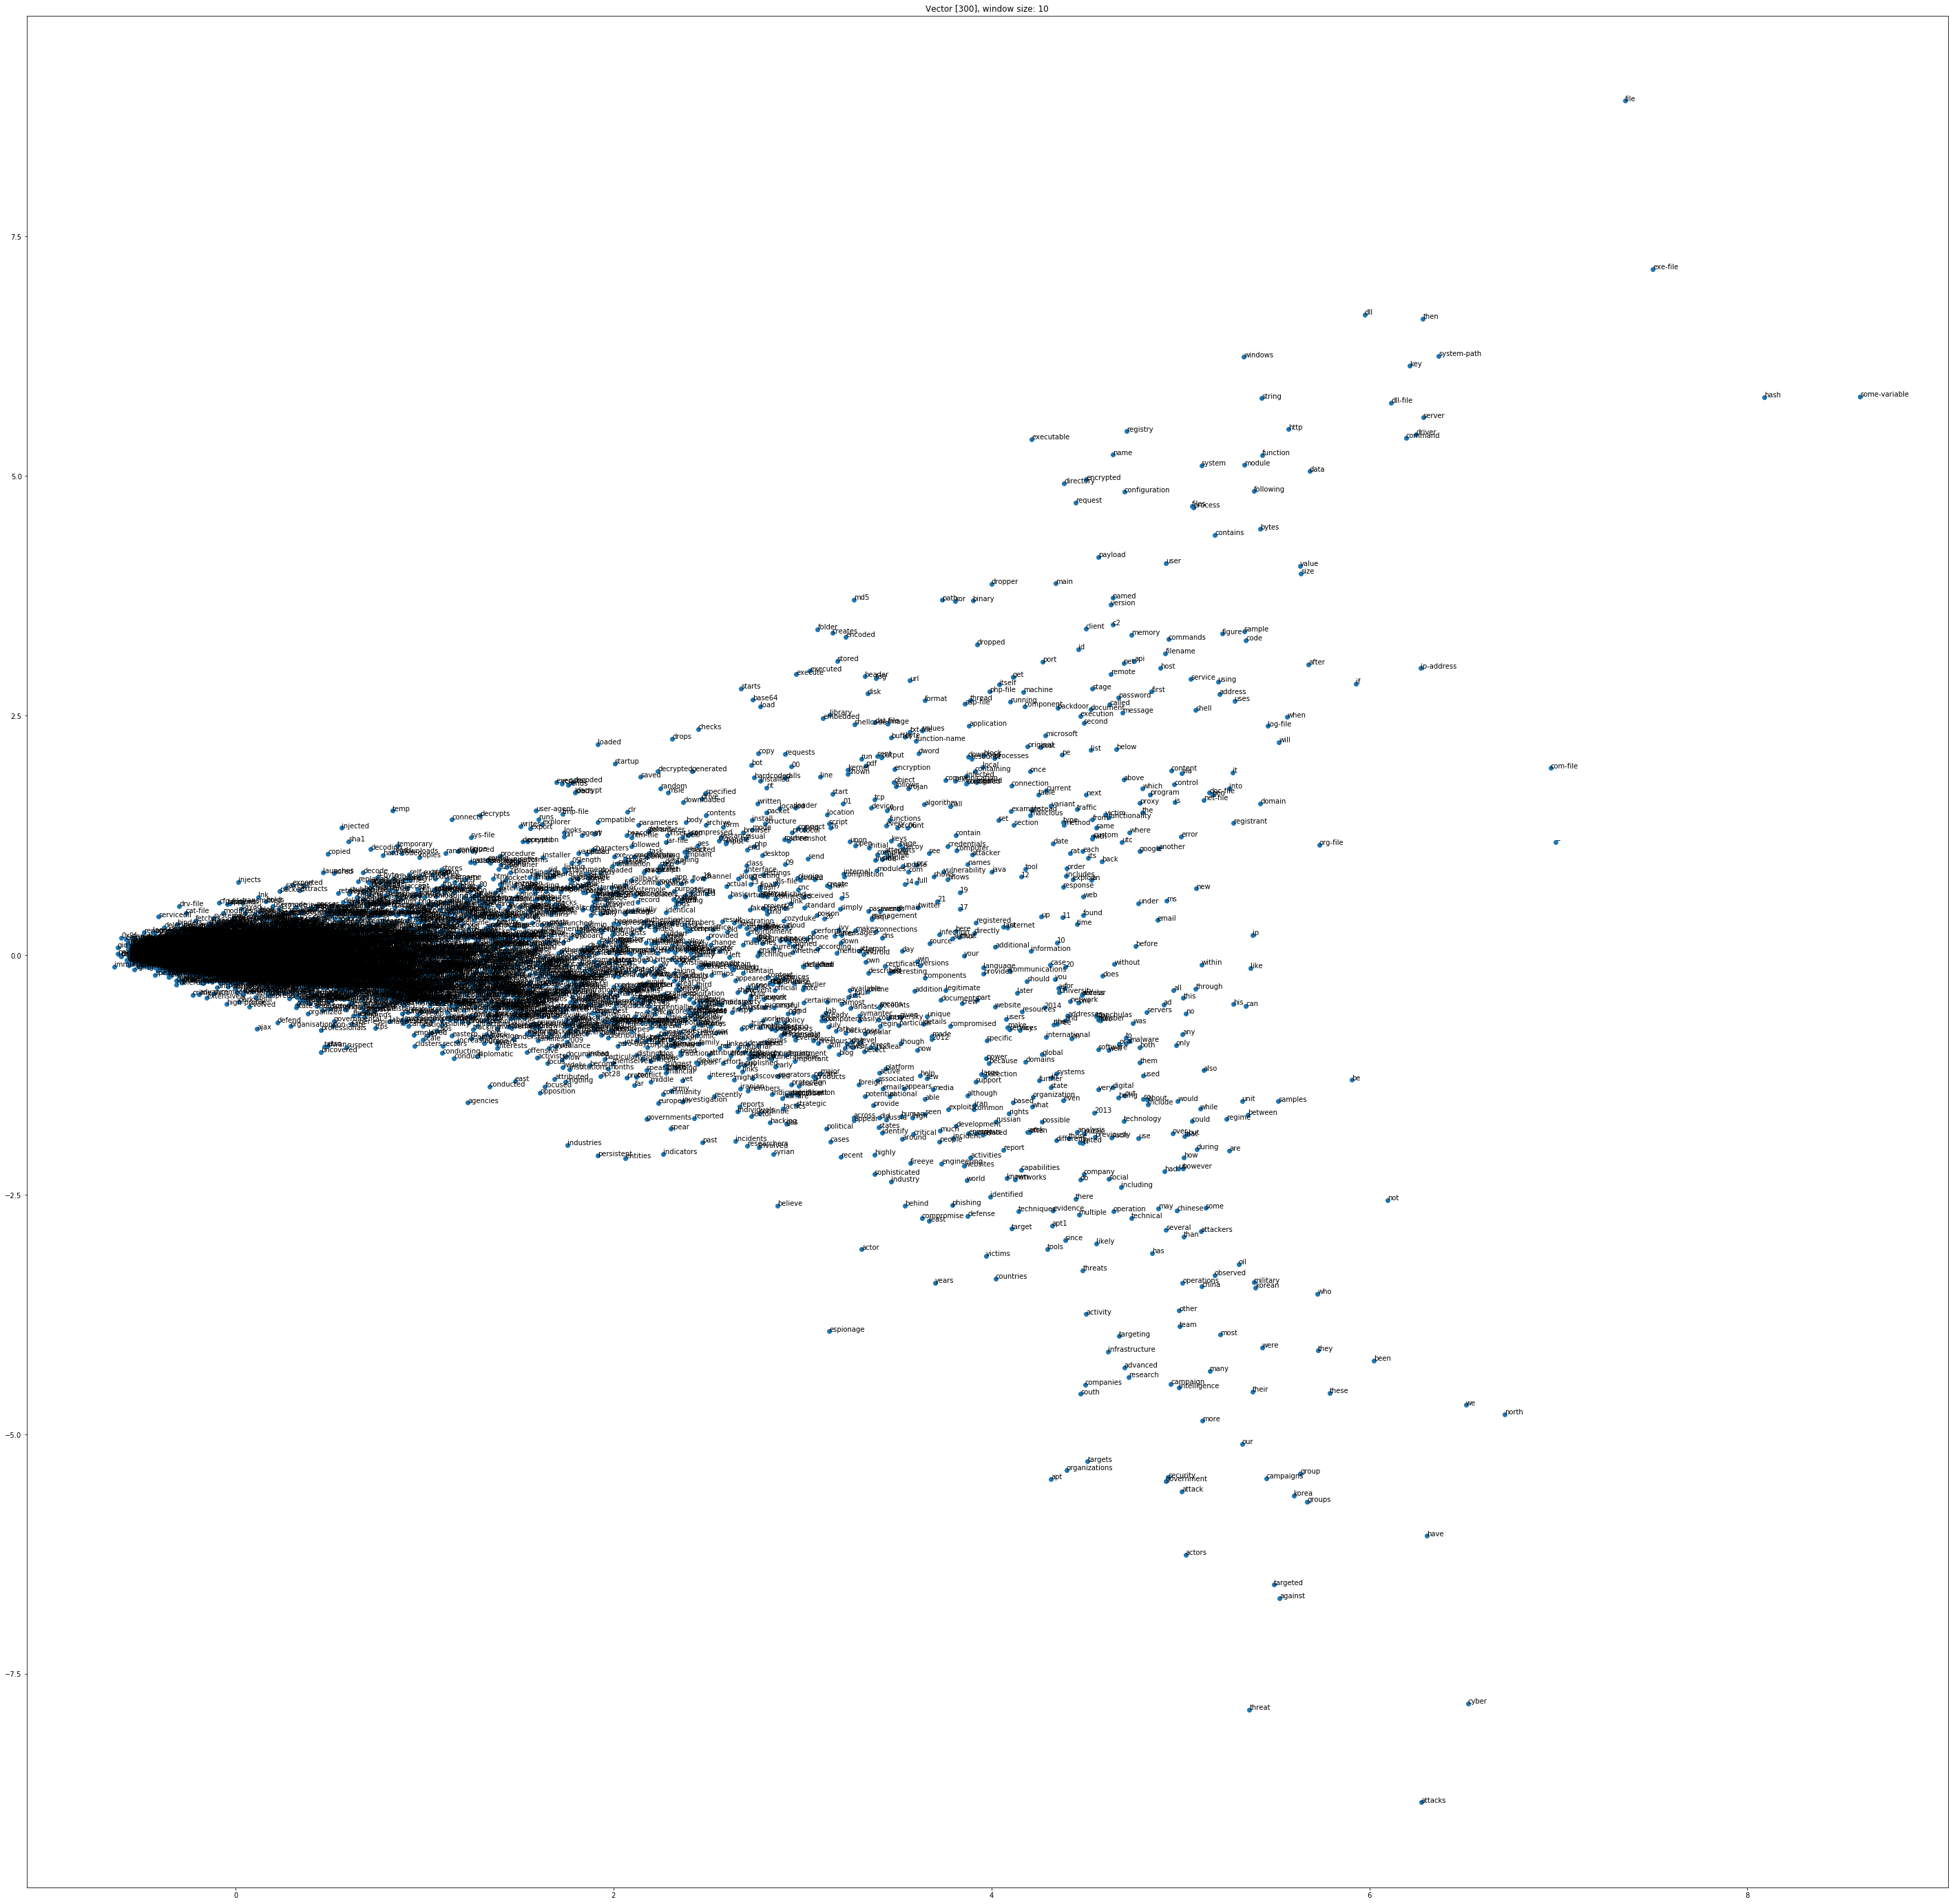

In [92]:
pca = PCA()
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.figure(figsize=(50, 50))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    
pyplot.title("Vector [{}], window size: {}".format(s, w))
pyplot.savefig("Embeddings.pdf",format='eps', dpi=1000)

In [69]:
tag_pattern = re.compile(r'<([a-zA-Z]+)>.*?<\/\1>')

def get_sentences_from_content(content):
    content = content.split()
    words = []
    
    is_section = False
    for word in content:
        if word == '<section>':
            is_section = True
        elif word == '</section>':
            is_section = False
        elif is_section:
            words.append(word)
    
    content = ' '.join(words)
    content = re.sub(tag_pattern, '', content)
    return sent_tokenize(content)

In [84]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

word_pattern = re.compile(r'[^a-zA-Z0-9-]')

def get_tokens_from_sentences(sents):
    result = []
    
    for s in sents:
        
        new_s = s
        new_s = clean_sentence(new_s)
        new_s = re.sub(word_pattern, " ", new_s)

        tokens = word_tokenize(new_s)
#         tokens = [t.lower() for t in tokens if t.lower() not in stopwords and len(t) > 2]
        tokens = [t.lower() for t in tokens]
#         tokens = [t for t in tokens if re.search('\d', t) is None]
        tokens = [t for t in tokens if len(t) > 1 and len(t) <= 25]
        result.append(tokens)

    return result